In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def generate_states(n):
    states = []
    for i in range(2 ** n):
        state = format(i, f'0{n}b')  # Binary representation
        state = state.replace('0', 'R').replace('1', 'B')  # Replace 0 with 'R' and 1 with 'B'
        states.append(state)
    return states


In [3]:
def transition_probability(n):
    transition_probs = {}
    for state in states:
        transition_probs[state] = {}
        for neighbor in states:
            diff_count = sum(1 for i in range(len(state)) if state[i] != neighbor[i])
            if diff_count == 1:
                transition_probs[state][neighbor] = 1 / n
            else:
                transition_probs[state][neighbor] = 0
    return transition_probs


In [4]:
def draw_markov_chain(states, transition_probs):
    G = nx.DiGraph()
    G.add_nodes_from(states)

    for state in states:
        for neighbor, prob in transition_probs[state].items():
            if prob > 0:
                G.add_edge(state, neighbor, weight=prob)

    pos = nx.spring_layout(G)
    labels = {state: state for state in states}
    edge_labels = {(u, v): f"{p:.2f}" for u, v, p in G.edges(data='weight')}
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='green', labels=labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Markov Chain Directed Graph")
    plt.show()


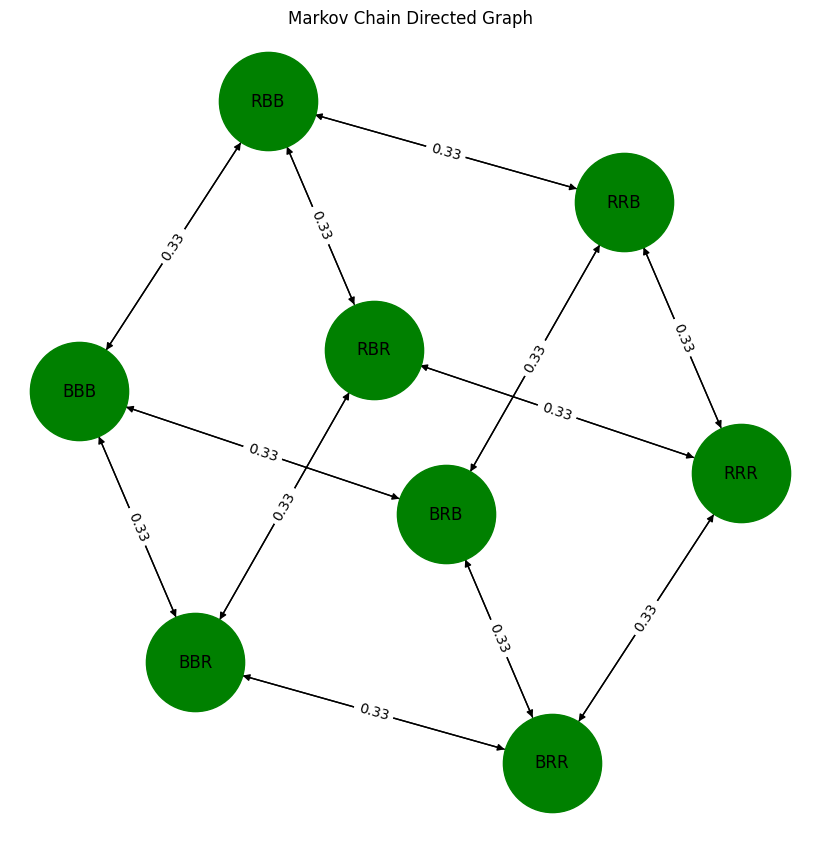

Number of states: 8
States:
RRR
RRB
RBR
RBB
BRR
BRB
BBR
BBB
Absorbing states: []
This is an absorbing Markov's Chain because it has absorbing states.


In [5]:
def find_absorbing_states(states, transition_probs):
    absorbing_states = []
    for state in states:
        is_absorbing = all(transition_probs[state][neighbor] == 0 for neighbor in states if neighbor != state)
        if is_absorbing:
            absorbing_states.append(state)
    return absorbing_states

n = 3
states = generate_states(n)
transition_probs = transition_probability(n)
draw_markov_chain(states, transition_probs)
absorbing_states = find_absorbing_states(states, transition_probs)

print(f"Number of states: {len(states)}")
print("States:")
for state in states:
    print(state)
print(f"Absorbing states: {absorbing_states}")
print(f"This is an absorbing Markov's Chain because it has absorbing states.")

In [6]:
import numpy as np

def compute_absorbing_probabilities(n):
    num_states = 2**n  # Total number of states

    # Initialize arrays to store absorbing states and probabilities
    absorbing_states = [0, n]  # 0 blue arcs and n red arcs
    absorbing_probabilities = np.zeros(num_states, dtype=float)

    # Calculate probabilities for absorbing states using binomial coefficients
    for k in absorbing_states:
        absorbing_probabilities += np.math.comb(n, k) / num_states

    return absorbing_probabilities

# Example usage:
n = 4  # Replace with your desired value of n
probabilities = compute_absorbing_probabilities(n)
print(f"Number of states for n = {n}: {2**n}")
print(f"Probabilities of eventually hitting absorbing states: {probabilities}")


Number of states for n = 4: 16
Probabilities of eventually hitting absorbing states: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125]


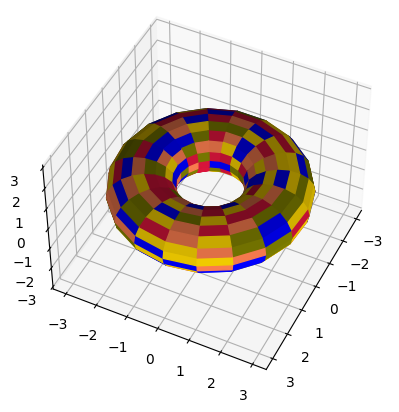

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate toroidal surface data (as you did in your original code)
angs = np.linspace(0, 2.*np.pi, 20)
theta, phi = np.meshgrid(angs, angs)
x = (2 + np.cos(theta)) * np.cos(phi)
y = (2 + np.cos(theta)) * np.sin(phi)
z = np.sin(theta)
rng = np.random.default_rng()
randind = rng.integers(5, size=x.shape)
colors = np.array(['crimson', 'coral', 'gold', 'blue', 'olive'])[randind]

# Plot the toroidal surface
surf = ax.plot_surface(x, y, z, facecolors=colors, linewidth=1)

# Set view angles and z-axis limits
ax.view_init(46, 26)
ax.set_zlim(-3, 3)

plt.show()


In [8]:
import numpy as np

def simulate_toroidal_color_process(n, k, max_iterations=1000):
    # Initialize the toroidal grid with random colors
    initial_state = np.random.randint(0, k, size=(n, n))

    absorbing_state = None
    for _ in range(max_iterations):
        # Randomly select a rectangle
        i, j = np.random.randint(0, n, size=2)

        # Randomly select one of the 8 neighbors
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        neighbor_i, neighbor_j = (i + di) % n, (j + dj) % n

        # Choose the neighbor's color
        chosen_color = initial_state[neighbor_i, neighbor_j]

        # Update the color of the selected rectangle
        initial_state[i, j] = chosen_color

        # Check if all cells have the same color (absorbing state)
        if np.all(initial_state == initial_state[0, 0]):
            absorbing_state = initial_state
            break

    return initial_state, absorbing_state

# Example usage:
n = 5  # Grid size, replace with your desired value
k = 4  # Number of colors, replace with your desired value
initial_state, absorbing_state = simulate_toroidal_color_process(n, k)

print("Initial State:")
print(initial_state)
if absorbing_state is not None:
    print("Absorbing State:")
    print(absorbing_state)
else:
    print("Simulation did not reach an absorbing state within the maximum iterations.")


Initial State:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Absorbing State:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


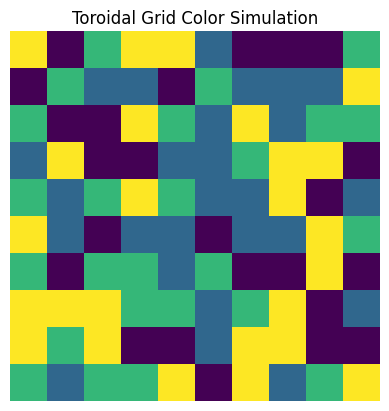

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def simulate_toroidal_color_process(n, k, max_iterations=1000, initial_state=None):
    # Initialize the toroidal grid with random colors
    if initial_state is None:
        initial_state = np.random.randint(0, k, size=(n, n))

    states = [initial_state.copy()]
    absorbing_state = None

    for _ in range(max_iterations):
        # Randomly select a rectangle
        i, j = np.random.randint(0, n, size=2)

        # Randomly select one of its 8 neighbors
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        neighbor_i, neighbor_j = (i + di) % n, (j + dj) % n

        # Choose the neighbor's color
        chosen_color = initial_state[neighbor_i, neighbor_j]

        # Update the color of the selected rectangle
        initial_state[i, j] = chosen_color

        states.append(initial_state.copy())

        # Check if all cells have the same color (absorbing state)
        if np.all(initial_state == initial_state[0, 0]):
            absorbing_state = initial_state
            break

    return states, absorbing_state

def animate_simulation(n, k, max_iterations=1000):
    initial_state = np.random.randint(0, k, size=(n, n))
    states, absorbing_state = simulate_toroidal_color_process(n, k, max_iterations, initial_state)
    num_frames = len(states)

    # Create the figure and axis
    fig, ax = plt.subplots()
    img = ax.imshow(states[0], cmap='viridis')

    def update(frame):
        img.set_array(states[frame])
        return img,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=range(num_frames), repeat=False)

    plt.axis('off')
    plt.title("Toroidal Grid Color Simulation")
    plt.show()



# Set parameters and run the animation
n = 10
k = 4
max_iterations = 5000  # Adjust as needed
animate_simulation(n, k, max_iterations)



In [11]:
anim.save('animation.mp4', writer='ffmpeg')


NameError: ignored